# Geometric transformations

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
img_path = os.path.join('..', '..', 'pics', 'pic.jpg')
img = cv2.imread(img_path)

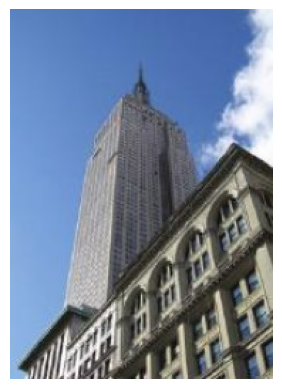

In [6]:
def show_cv2_img(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')

show_cv2_img(img)   

## Scaling

(260, 185, 3) (520, 370, 3)


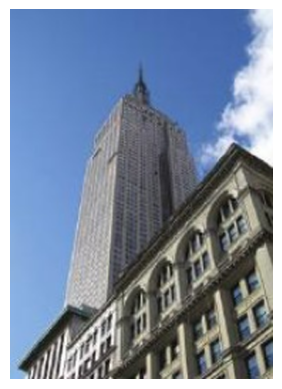

In [9]:
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
print(img.shape, res.shape)
show_cv2_img(res)

## Translation

Transformation matrix

$$
M = \begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}
$$

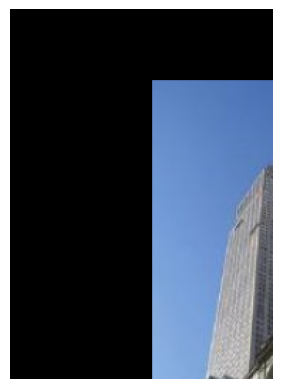

In [11]:
rows, cols, _ = img.shape
 
M = np.float32([[1,0,100],[0,1,50]]) # 100 for x axis, 50 for y axis
dst = cv2.warpAffine(img,M,(cols,rows))
show_cv2_img(dst)

## Rotation

Transformation matrix for rotation around arbitrary point and scaling
$$
M = \begin{bmatrix}
\alpha & \beta & (1-\alpha)\cdot center.x - \beta \cdot center.y \\
-\beta & \alpha & \beta \cdot center.x + (1-\alpha) \cdot center.y
\end{bmatrix},
$$
where
$$
\begin{matrix}
    \alpha = scale \cdot \cos \theta,\\
    \beta = scale \cdot \sin \theta
\end{matrix}
$$

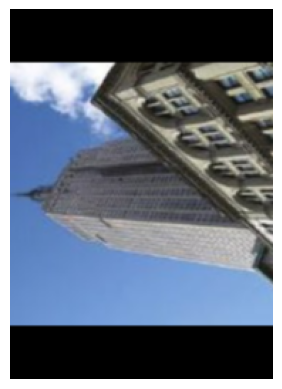

In [12]:
# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
show_cv2_img(dst)

## Affine transformation

An affine transformation preserves:
- Parallelism of lines
- Ratios of distances along lines
- But it can change angles and lengths

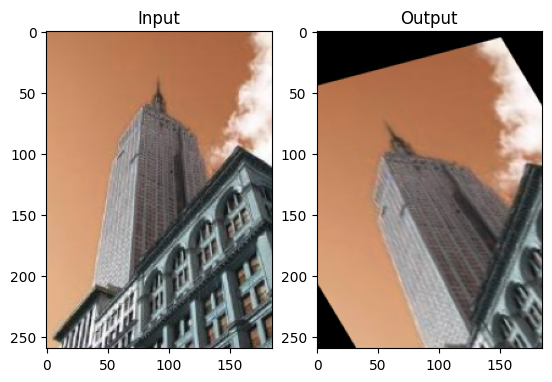

In [13]:
img = cv2.imread(img_path)
rows,cols,ch = img.shape
 
pts1 = np.float32([[50,50],[200,50],[50,200]]) # coordinates of transformation points in input image
pts2 = np.float32([[10,100],[200,50],[100,250]]) # coordinates of transformation points in output image
 
M = cv2.getAffineTransform(pts1,pts2)
 
dst = cv2.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective transformation

Perspective Transform:
- Keeps straight lines straight
- Can change angles and perspective
- Used to correct perspective distortions

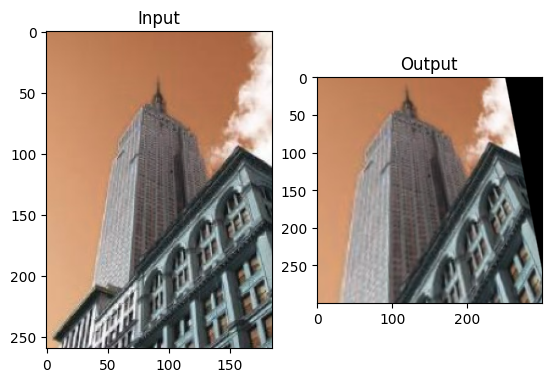

In [ ]:
pts1 = np.float32([[30,30],[230,30],[30,180],[180,230]]) # 4 angles of distorted image
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]]) # output angle points
 
M = cv2.getPerspectiveTransform(pts1,pts2)
 
dst = cv2.warpPerspective(img,M,(300,300))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()